In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
start_h = 1600
delta_h = 400

n_slice = 4

# ending hour
end_h = start_h + delta_h

# time indices for DAC
start_h_DAC_idx = start_h * n_slice
end_h_DAC_idx = end_h * n_slice

FIGSIZE = (20, 8)
FONTSIZE_BIG = 20
FONTSIZE_SMALL = 15

## Function

### Plot DAC Dynamics

In [1]:
def plot_dac_sorbent(folder, ax, xaxis=True):

    # read results
    f_name = 'results_DAC_air.csv'
    address = "/Users/pengfeicheng/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/FLECCS/NPV-update/"
    df = pd.read_csv(address + folder + '/' + f_name)

    f_air = df["x_F"]
    s_air = df["x_S"]
    A0_air = df["x_A0"]
    A1_air = df["x_A1"]
    R_air = df["x_R"]

    # modify amount of fresh and saturated sorbent
    fresh_sorbent = f_air - A0_air
    saturated_sorbent = s_air - R_air

    # get time range
    t_DAC_idx_range = range(start_h_DAC_idx, end_h_DAC_idx)
    t_DAC_range = df.loc[t_DAC_idx_range, 'time']

    # bar width
    w = 1 / n_slice

    # --------------------------------------------------------------------------

    ax.bar(t_DAC_range,
            fresh_sorbent.iloc[t_DAC_idx_range],
            label="fresh",
            color="lightblue",
            align="edge",
            width=w)
    ax.bar(t_DAC_range,
            A0_air.iloc[t_DAC_idx_range],
            bottom=fresh_sorbent.iloc[t_DAC_idx_range],
            label="absorption",
            color="moccasin",
            align="edge",
            width=w)
    ax.bar(t_DAC_range,
            A1_air.iloc[t_DAC_idx_range],
            bottom=fresh_sorbent.iloc[t_DAC_idx_range] +
            A0_air.iloc[t_DAC_idx_range],
            label="15-min absorption",
            color="lavender",
            align="edge",
            width=w)
    ax.bar(t_DAC_range,
            saturated_sorbent.iloc[t_DAC_idx_range],
            bottom=fresh_sorbent.iloc[t_DAC_idx_range] +
            A0_air.iloc[t_DAC_idx_range] +
            A1_air.iloc[t_DAC_idx_range],
            label="saturated",
            color="lightcoral",
            align="edge",
            width=w)
    ax.bar(t_DAC_range,
            R_air.iloc[t_DAC_idx_range],
            bottom=fresh_sorbent.iloc[t_DAC_idx_range] +
            A0_air.iloc[t_DAC_idx_range] +
            A1_air.iloc[t_DAC_idx_range] +
            saturated_sorbent.iloc[t_DAC_idx_range],
            label="regeneration",
            color="plum",
            align="edge",
            width=w)

    # --------------------------------------------------------------------------

    # if price == 150:
    #         j = 0
    # else:
    #         j = 1

    # ax.set_title(f"({['a', 'b'][j]}) CO2 price = {price}", fontsize=40, pad=15)
    # ax.set_title(f"CO2 price = {price}", fontsize=40, pad=15)

    # --------------------------------------------------------------------------

    # x ticks
    x_ticks = np.arange(start_h, end_h + 1, step=int((end_h - start_h) / 4))
    ax.set_xticks(x_ticks)

    # --------------------------------------------------------------------------

    # labels
    if xaxis:
        ax.set_xlabel("hour", fontsize=FONTSIZE_BIG)
    ax.set_ylabel("sorbent mass (tonne)", fontsize=FONTSIZE_BIG)
    ax.set_xlim(start_h, end_h)
    ax.set_ylim(0, 2989)
    plt.setp(ax.get_xticklabels(), fontsize=FONTSIZE_SMALL)
    plt.setp(ax.get_yticklabels(), fontsize=FONTSIZE_SMALL)

    params = {'legend.fontsize': FONTSIZE_BIG, 'legend.handlelength': 2}
    plt.rcParams.update(params)

    # ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    ax.legend()

### Plot Electricity Price

In [34]:
def plot_price_signal(signal, ax):
    df_price = pd.read_csv("/Users/pengfeicheng/Documents/research/FLECCS/code/src/resources/overall-price-signals.csv")

    price = df_price[signal]

    ax.plot(price[:end_h], 'r-', label='load factor')

    plt.setp(ax.get_xticklabels(), fontsize=FONTSIZE_SMALL)
    plt.setp(ax.get_yticklabels(), fontsize=FONTSIZE_SMALL)
    ax.set_ylabel("electricity price/$/MWh", fontsize=FONTSIZE_BIG)
    ax.set_xlabel("hour", fontsize=FONTSIZE_BIG)
    ax.set_xlim([0, end_h])
    ax.set_ylim([-5, 130])

### Plot Load Factor

In [35]:
def plot_load(folder, ax):

    # read results
    f_name = 'results_power.csv'
    address = "/Users/pengfeicheng/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/FLECCS/NPV-update/"
    df = pd.read_csv(address + folder + '/' + f_name)

    dispatch = df['x_load_factor']

    ax.plot(dispatch[:end_h], 'r-', label='load factor')

    plt.setp(ax.get_xticklabels(), fontsize=FONTSIZE_SMALL)
    plt.setp(ax.get_yticklabels(), fontsize=FONTSIZE_SMALL)
    ax.set_ylabel("electricity price/$/MWh", fontsize=FONTSIZE_BIG)
    ax.set_xlabel("hour", fontsize=FONTSIZE_BIG)
    ax.set_xlim([0, end_h])
    ax.set_ylim([-5, 105])

## Plot

### pure DAC dynamics

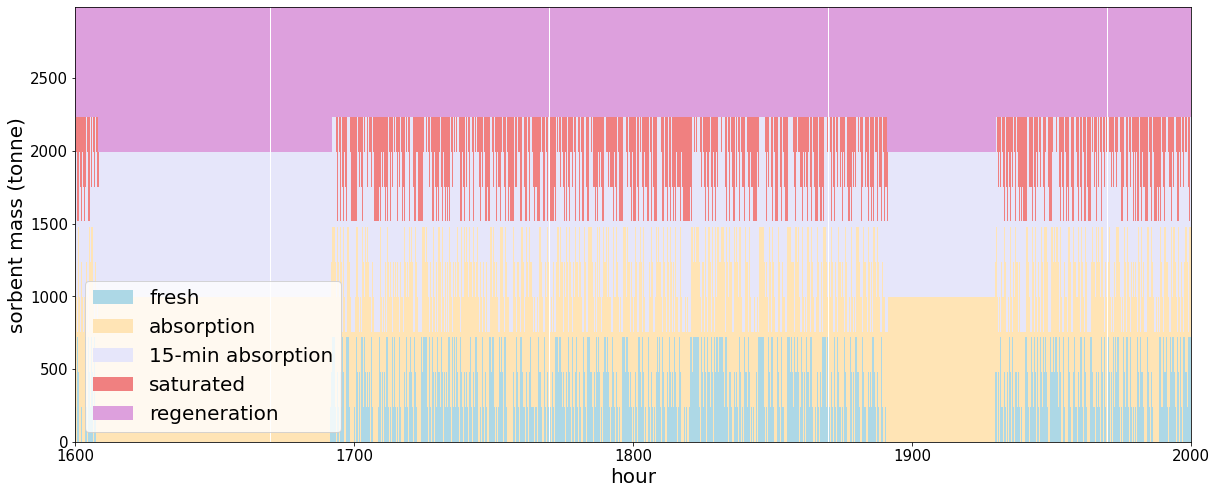

In [4]:
fig, axes = plt.subplots(1, 1, figsize=FIGSIZE)
folder = 'START-5-NG-383-12-month-300-MiNg_150_ERCOT'
plot_dac_sorbent(folder, axes)
# plot_load(150, axes)

### DAC dynamics + price signal

<ipython-input-6-e11a6e9c9a1f>:83: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(ax.get_xticklabels(), Fontsize=20)
<ipython-input-6-e11a6e9c9a1f>:84: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(ax.get_yticklabels(), Fontsize=20)
<ipython-input-4-7dcff098c269>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(ax.get_xticklabels(), Fontsize=20)
<ipython-input-4-7dcff098c269>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(ax.get_yticklabels(), Fontsize=20)


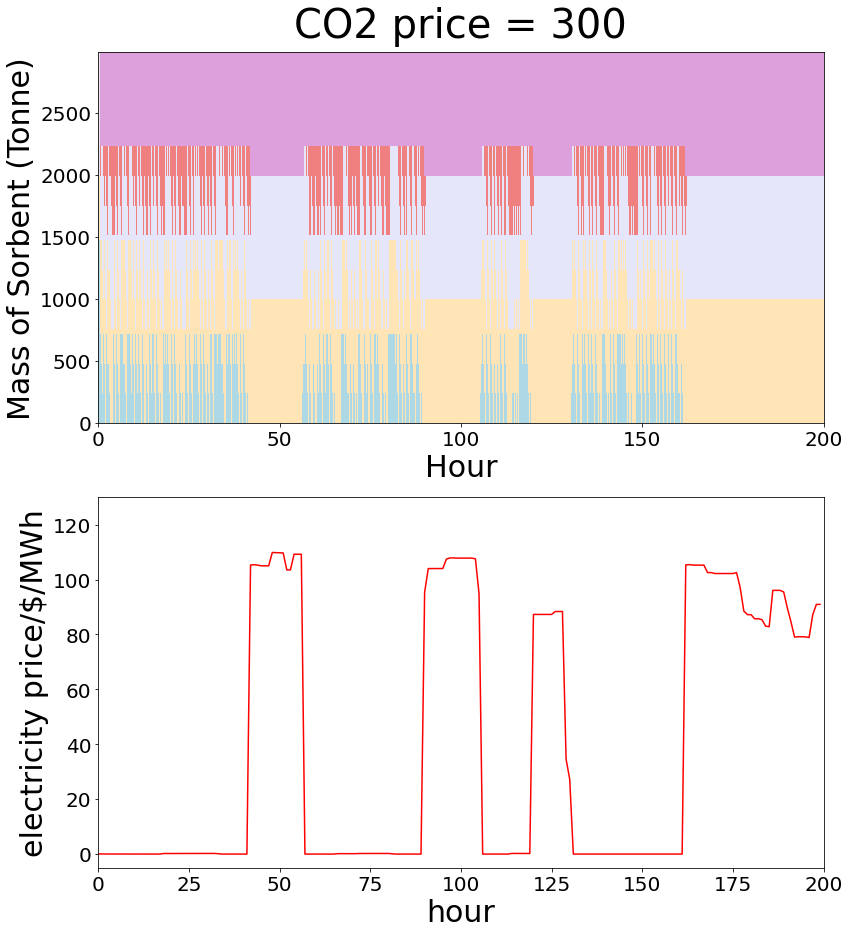

In [11]:
# fig, axes = plt.subplots(2, 2, figsize=(26, 15))
# plot_dac_sorbent(150, axes[0][0])
# plot_dac_sorbent(300, axes[0][1])
# plot_price_signal("MiNg_150_ERCOT", axes[1][0])
# plot_price_signal("MiNg_150_ERCOT", axes[1][1])

fig, axes = plt.subplots(2, 1, figsize=(13, 15))
plot_dac_sorbent(300, axes[0])
# plot_dac_sorbent(300, axes[0][1])
plot_price_signal("MiNg_150_ERCOT", axes[1])
# plot_price_signal("MiNg_150_ERCOT", axes[1][1])

### DAC utilization + load

<ipython-input-2-ebdcf6347f5b>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(ax1.get_xticklabels(), Fontsize=15)
<ipython-input-2-ebdcf6347f5b>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(ax1.get_yticklabels(), Fontsize=15)
<ipython-input-2-ebdcf6347f5b>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(ax2.get_yticklabels(), Fontsize=15)


Text(0, 0.5, 'load factor')

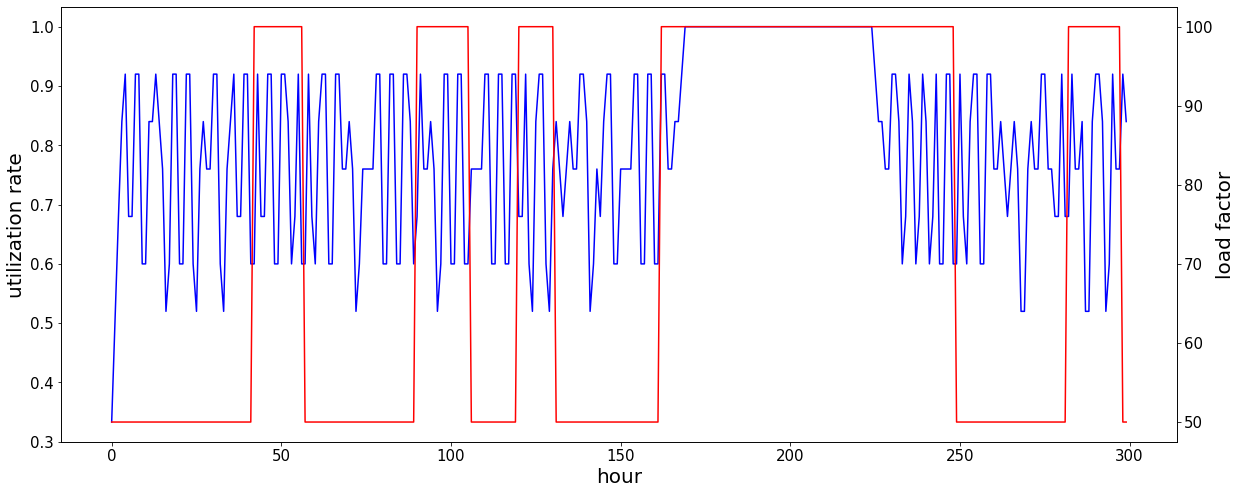

In [2]:
total_sorbent = 2988.568680
utilization = (total_sorbent - fresh_sorbent - saturated_sorbent) / total_sorbent

df_power = pd.read_csv("/Users/pengfeicheng/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/FLECCS/NPV-update/12-month-300-MiNg_150_ERCOT/results_power.csv")
dispatch = df_power['x_load_factor']

fig, ax1 = plt.subplots(figsize=(20, 8))
ax1.plot(utilization[:delta_h], 'b-', label='DAC utilization')

ax2 = ax1.twinx()
ax2.plot(dispatch[:delta_h], 'r-', label='load factor')

# ax1.legend()
# ax2.legend()
plt.setp(ax1.get_xticklabels(), fontsize=15)
plt.setp(ax1.get_yticklabels(), fontsize=15)
plt.setp(ax2.get_yticklabels(), fontsize=15)
ax1.set_ylabel("utilization rate", fontsize=20)
ax1.set_xlabel("hour", fontsize=20)
ax2.set_ylabel("load factor", fontsize=20)

### ERCOT 150: DAC dynamics + load

(1600.0, 2000.0)

/Users/pengfeicheng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


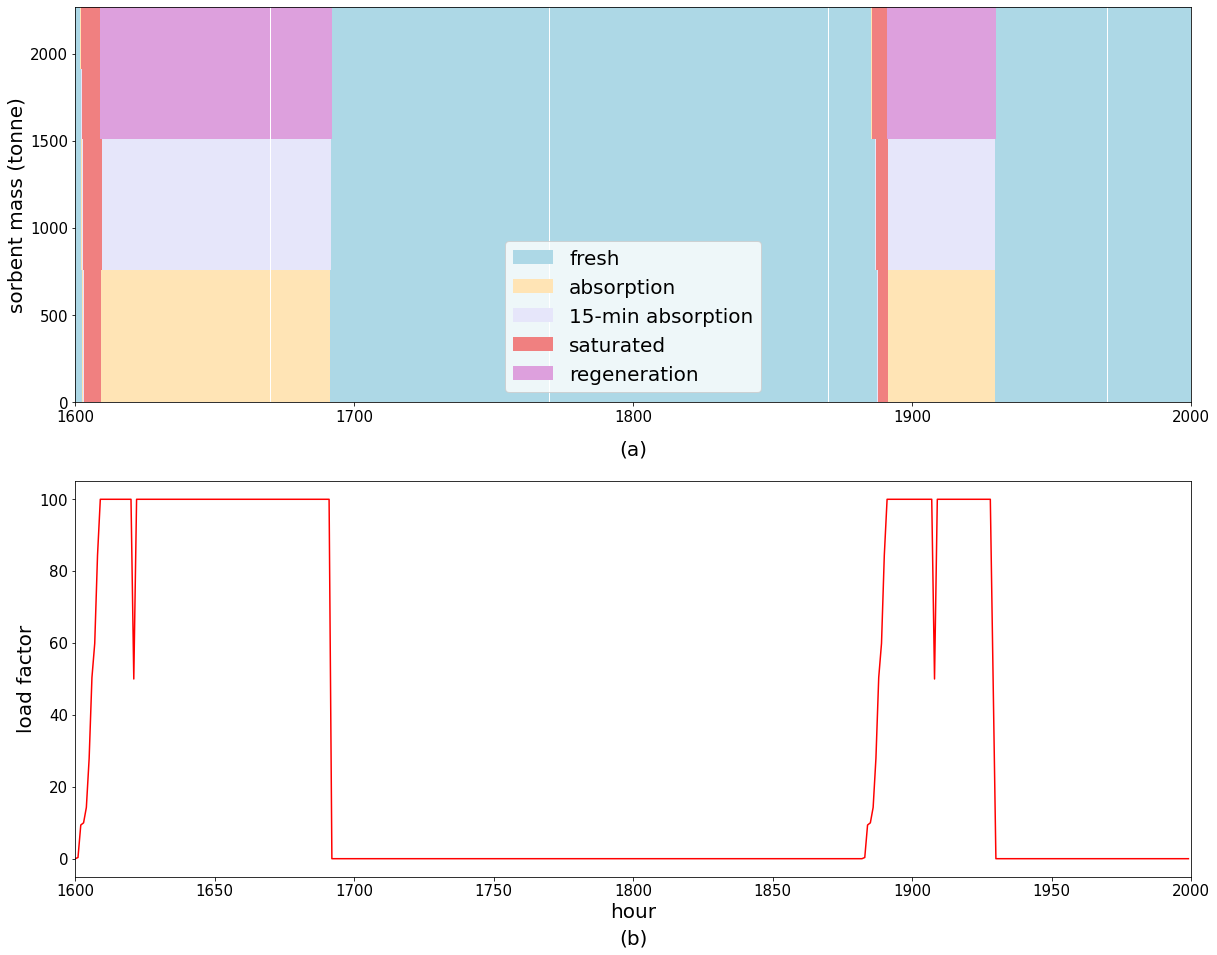

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(20, 16))

folder = 'START-5-NG-383-12-month-150-MiNg_150_ERCOT'
plot_dac_sorbent(folder, axes[0], xaxis=False)
axes[0].set_title("(a)", y=-0.15, fontsize=20)

df_power = pd.read_csv("/Users/pengfeicheng/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/FLECCS/NPV-update/START-5-NG-383-12-month-150-MiNg_150_ERCOT/results_power.csv")
dispatch = df_power['x_load_factor']

axes[1].plot(dispatch[start_h:end_h], 'r-', label='load factor')

plt.setp(axes[1].get_xticklabels(), fontsize=FONTSIZE_SMALL)
plt.setp(axes[1].get_yticklabels(), fontsize=FONTSIZE_SMALL)
axes[1].set_ylabel("load factor", fontsize=FONTSIZE_BIG)
axes[1].set_xlabel("hour", fontsize=FONTSIZE_BIG)
axes[1].set_title("(b)", y=-0.185, fontsize=FONTSIZE_BIG)
axes[1].set_xlim([start_h, end_h])